# Bike sharing - Hypothesis Testing

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write t1orary files to /kaggle/t1/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


**Business Problem:**
- To know/understand about the variables or factors which are significant in predicting the demand for shared electric cycles in the Indian market and how well those variables/factors describe the electric cycle demands.

**Dataset and Column Profiling:**:

- timestamp - timestamp field for grouping the data
- cnt - the cnt of a new bike shares
- t1 - real t1erature in C
- t2 - t1erature in C "feels like"
- hum - humidity in percentage
- windspeed - wind speed in km/h
- weather_codecode - category of the weather_code
    - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
    - 2 = scattered clouds / few clouds
    - 3 = Broken clouds
    - 4 = Cloudy
    - 7 = Rain/ light Rain shower/ Light rain
    - 10 = rain with thunderstorm
    - 26 = snowfall
- isis_holiday - boolean field - 1 is_holiday / 0 non is_holiday
- isweekend - boolean field - 1 if the day is weekend
- season - category(0-spring ; 1-summer; 2-fall; 3-winter)



**Importing required packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [4]:
bike_data = pd.read_csv('../input/london-bike-sharing-dataset/london_merged.csv')
bike_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
bike_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
# Converting timestamp object into timestamp64[ns] for finding useful insights
bike_data['timestamp'] = bike_data['timestamp'].astype('datetime64[ns]')

In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [9]:
bike_data.shape

(17414, 10)

In [10]:
bike_data.isnull().sum()/len(bike_data) * 100

timestamp       0.0
cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
dtype: float64

In [11]:
bike_data.nunique()

timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64

In [12]:
bike_data.duplicated().sum()

0

**Observations:** 
- There are total 4 categorical features namely Season, is_holiday, is_weekend, weather_code and 7 numerical/continuos features and 1 datatime object. In total 12 independent features with 10886 rows.
- Missing data or Null values are not present , neither any duplicated row is there.

# Outlier Detection and Removal:

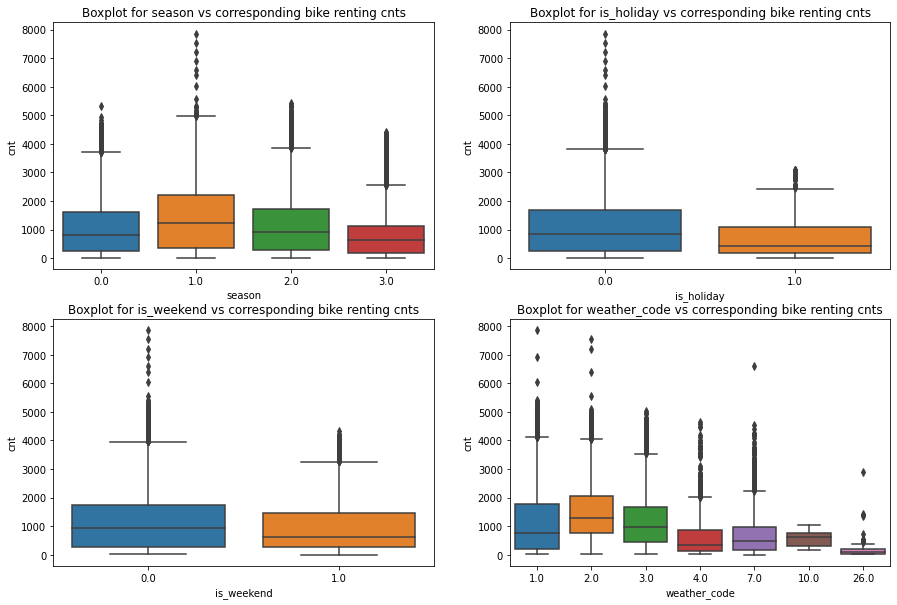

In [13]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'is_holiday', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'is_weekend', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather_code', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for weather_code vs corresponding bike renting cnts')

plt.show()

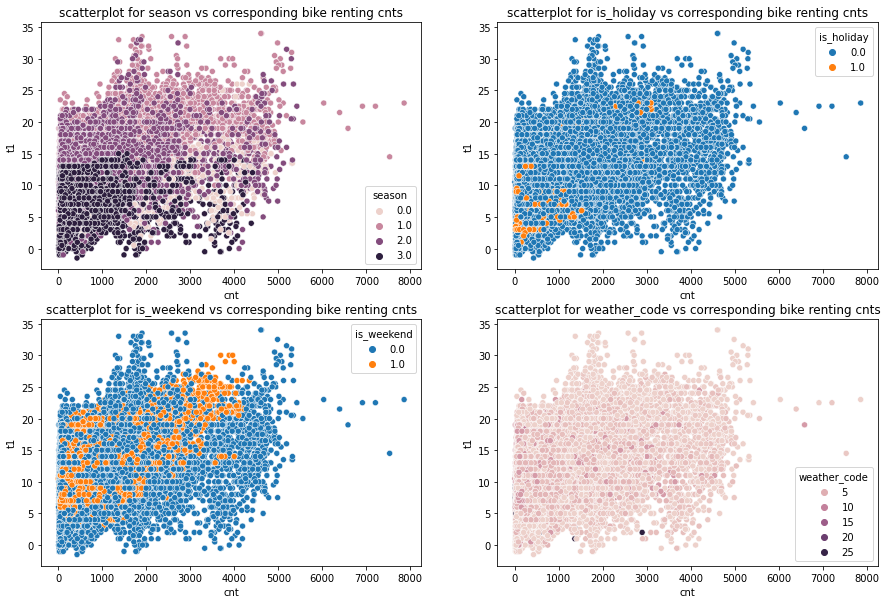

In [14]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='cnt', y = 't1', data = bike_data, hue ='is_holiday')
ax1.set_title('scatterplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='is_weekend')
ax1.set_title('scatterplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'cnt',y = 't1',data = bike_data, hue ='weather_code')
ax1.set_title('scatterplot for weather_code vs corresponding bike renting cnts')

plt.show()

In [16]:
bike_dcopy = bike_data.copy() # Taken backup of orginial dataset before removing outliers

In [17]:
q1=bike_data['cnt'].quantile(0.25)
q3=bike_data['cnt'].quantile(0.75)
iqr=q3-q1
bike_data = bike_data[(bike_data['cnt'] >= q1 - 1.5*iqr) & (bike_data['cnt'] <= q3 +1.5*iqr)]
bike_data.shape

(16739, 10)

In [18]:
bike_dcopy.shape[0] - bike_data.shape[0]

675

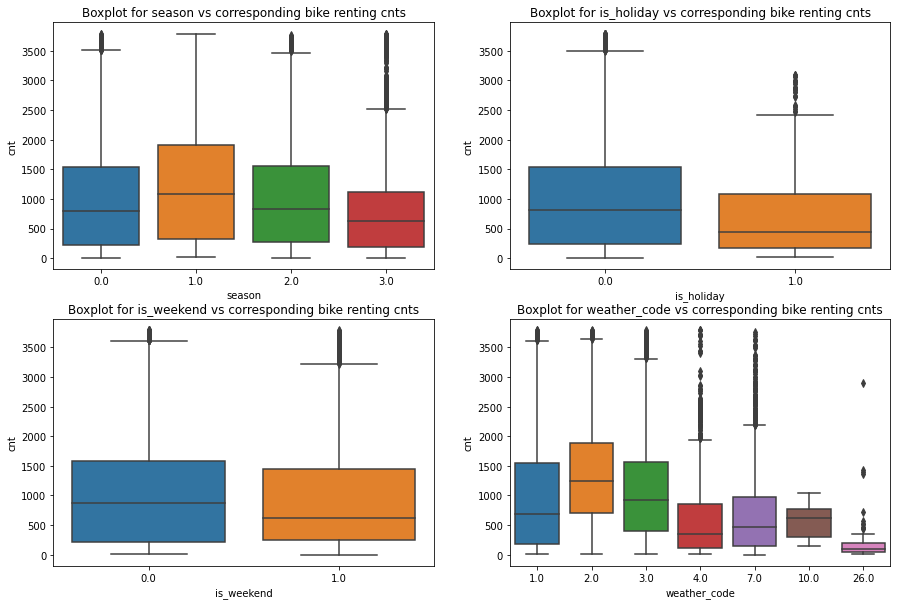

In [19]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.boxplot(x = 'is_holiday', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'is_weekend', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather_code', y = 'cnt', data = bike_data)
ax1.set_title('Boxplot for weather_code vs corresponding bike renting cnts')

plt.show()

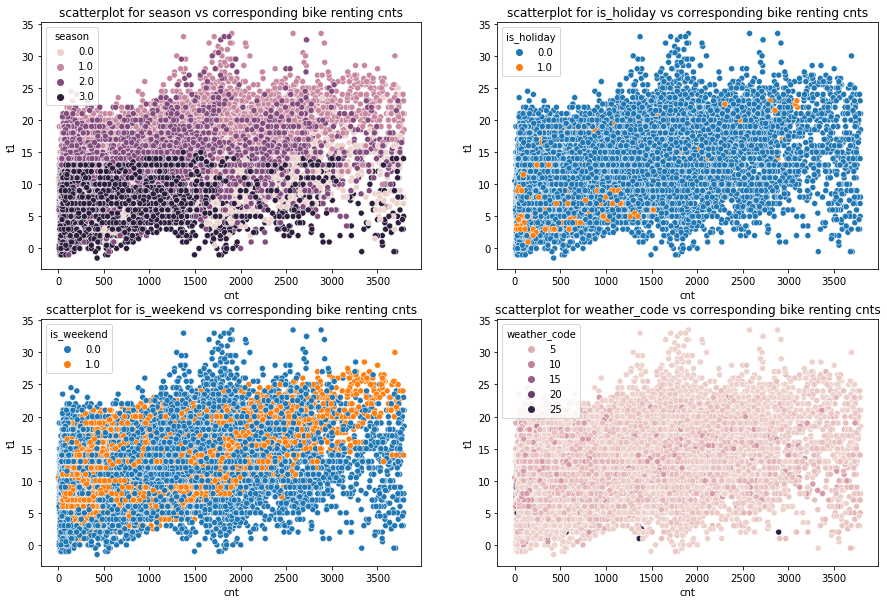

In [20]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='cnt', y = 't1', data = bike_data, hue ='is_holiday')
ax1.set_title('scatterplot for is_holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'cnt', y = 't1',data = bike_data, hue ='is_weekend')
ax1.set_title('scatterplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'cnt',y = 't1',data = bike_data, hue ='weather_code')
ax1.set_title('scatterplot for weather_code vs corresponding bike renting cnts')

plt.show()

**Observations:** 
- After dealing with the ouliers , 300 rows are removed out of 10886 from the dataset. As we can see from above boxplot and scatterplot, the data now looks more clean.

# Univariate Analysis and Bivariate Analysis:

**timestamp specific EDA:**

As we will be finding some useful insights w.r.t the timeseries data, we will will working on the original dataset before removing outliers which is **bike_dcopy**

In [21]:
#creating a new dataframe for indexing timestamp
bike_datatime = pd.read_csv('../input/london-bike-sharing-dataset/london_merged.csv')
bike_datatime

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [22]:
bike_dcopy["timestamp"].sort_values() 

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [23]:
bike_dcopy['Year'] = bike_dcopy['timestamp'].dt.year
bike_dcopy['Month'] = bike_dcopy['timestamp'].dt.month
bike_dcopy['Day'] = bike_dcopy['timestamp'].dt.day
bike_dcopy

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3


In [24]:
np.sort(bike_dcopy[bike_dcopy['cnt'] >= bike_dcopy['cnt'].quantile(0.75)]['Day'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [25]:
bike_dcopy[bike_dcopy['cnt'] >= bike_dcopy['cnt'].quantile(0.95)]['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [27]:
bike_dcopy['year'] = bike_dcopy['timestamp'].dt.year

In [28]:
bike_dcopy['month'] = bike_dcopy['timestamp'].dt.month

In [29]:
bike_dcopy.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,2015,1


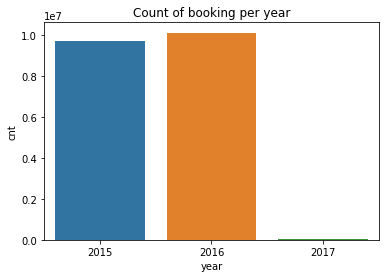

In [30]:
year_data = bike_dcopy.groupby(['year'])['cnt'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='cnt',data=year_data)
plt.title('Count of booking per year')
plt.show()

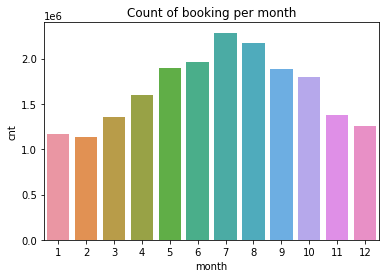

In [31]:
month_data = bike_dcopy.groupby(['month'])['cnt'].sum()
month_data = month_data.reset_index()
sns.barplot(x='month',y='cnt',data=month_data)
plt.title('Count of booking per month')
plt.show()

In [33]:
mon_year_data = bike_dcopy.groupby(['year','month'])['cnt'].sum()
mon_year_data = pd.DataFrame(mon_year_data)
mon_year_data.reset_index(inplace = True)
myy = mon_year_data.pivot('month','year','cnt').fillna(0)

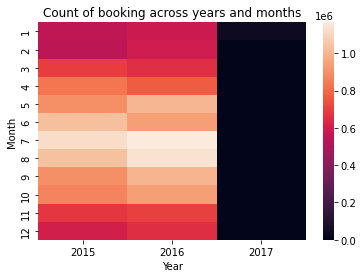

In [34]:
sns.heatmap(myy)
plt.title('Count of booking across years and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

As infered earlier the data booking is almost same across all the months.

**Observations:** 
- As the data ranges from 1st Jan 2011 to 19th Dec 2012, the cnt of the bikes rented will also be in this time period of almost 2 years.
- During months of September and October, maximum number of  bikes are rented.
- The cnt is less in the cold seasons of winter(Months such as Nov, Dec, Jan, Feb) where due to cold, people prefer mostly not to ride the bikes.
- As we can see, the data contains dates from 1 to 19th of a particular month.
- As we can from the monthwose bar plot , the demand for  bikes at the starting months is quite low as compared to months from March 2012 onwards. There's adrop in the middle owing to cold and winter season.
- Booking from 2017 is nearly zero so far.
- Almost all the months have same number of bookings.


In [36]:
#Univariate analysis for numerical/continuos variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [37]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16739 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     16739 non-null  datetime64[ns]
 1   cnt           16739 non-null  int64         
 2   t1            16739 non-null  float64       
 3   t2            16739 non-null  float64       
 4   hum           16739 non-null  float64       
 5   wind_speed    16739 non-null  float64       
 6   weather_code  16739 non-null  float64       
 7   is_holiday    16739 non-null  float64       
 8   is_weekend    16739 non-null  float64       
 9   season        16739 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.9 MB


In [38]:
bike_data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [39]:
num_cols = ['t1','t2','hum','cnt','wind_speed']
num_cols

['t1', 't2', 'hum', 'cnt', 'wind_speed']

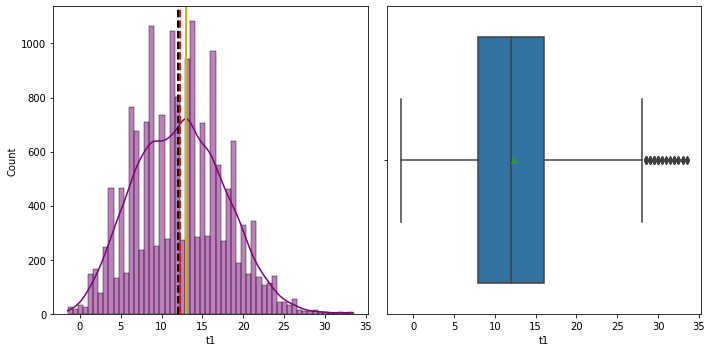

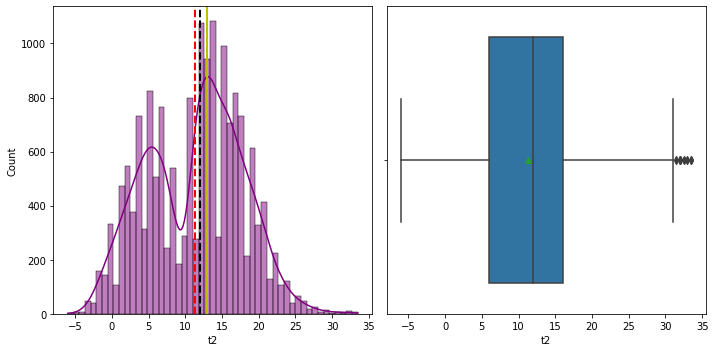

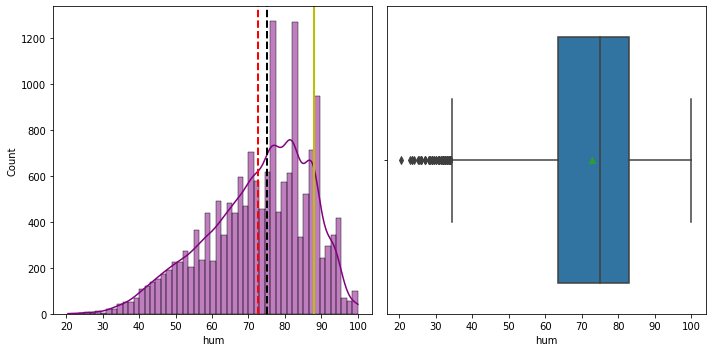

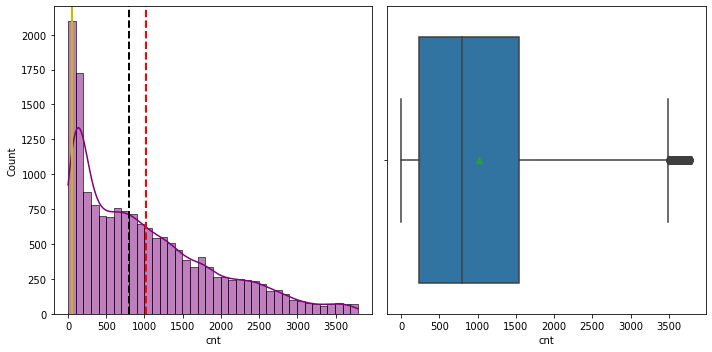

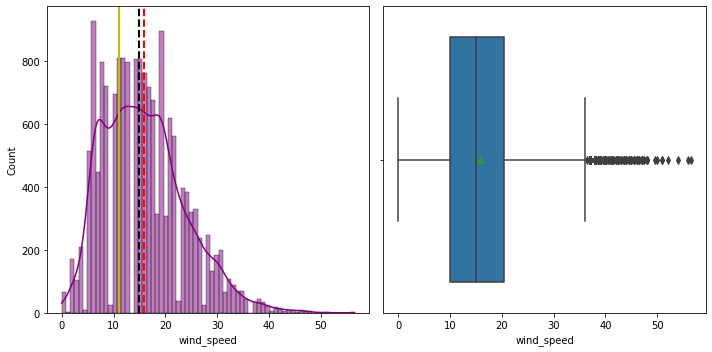

In [40]:
for i in num_cols:
    num_feat(bike_data[i])
    

**Observations for univariate numerical features:**
- There are outliers in windspeed and casual users which tells us that, the windspeed in not uniform. 
- The exponentil decay curve for the cnt tells that, as the users renting bikes increases, the frequency decreases.

In [42]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [43]:
bike_data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [44]:
cat_cols = ['season', 'is_holiday', 'is_weekend', 'weather_code']
cat_cols

['season', 'is_holiday', 'is_weekend', 'weather_code']

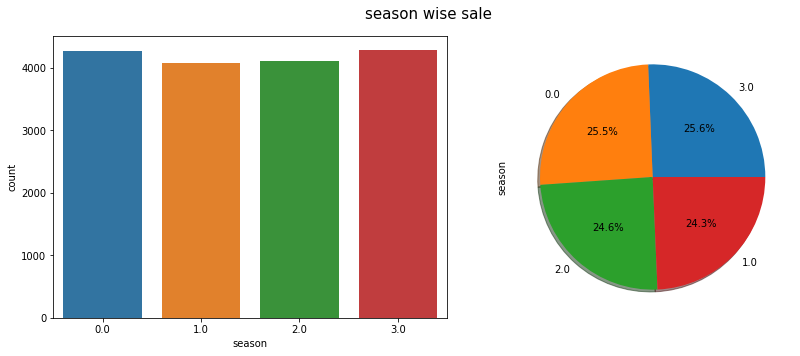

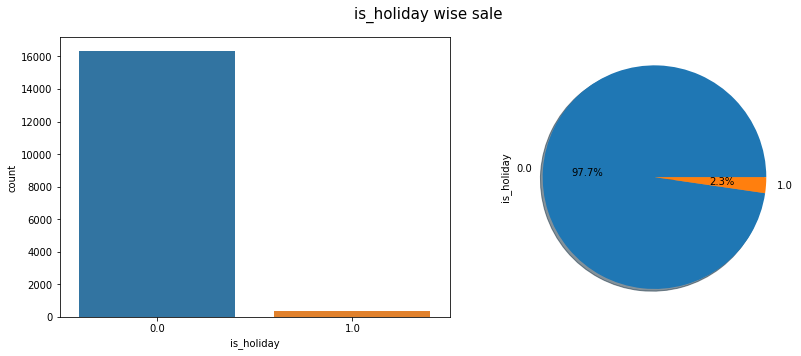

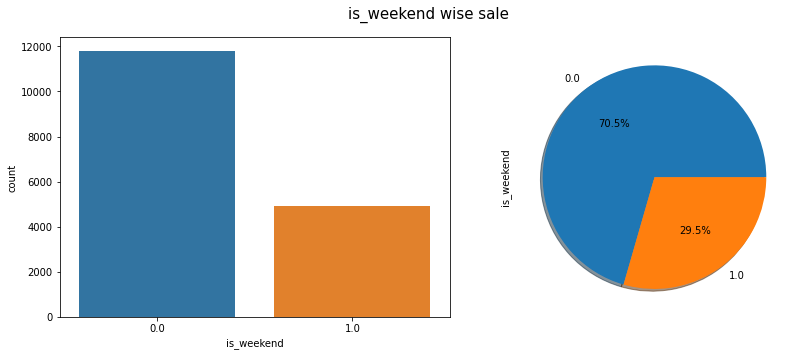

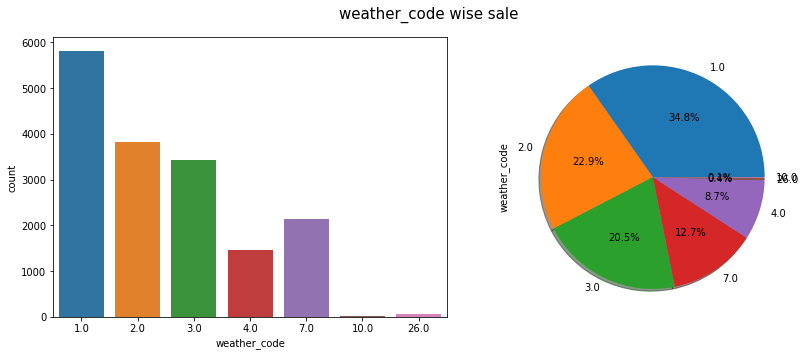

In [45]:
for i in cat_cols:
    cat_feat(bike_data[i])

**Observations for univariate categorical features:**
- For weather_code, 10th and 26th  (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- cnt for bikes rentied in working day is much higher than non working day.
- During is_holidays, people don't prefer to ride bikes.
- When the weather_code is Clear with Few clouds, people tend to rent more  bikes for their comute.
- During the spring, summer, fall, winter, the cnt is more or less equal for the users renting bikes

**Corelation between Bivariate features:**


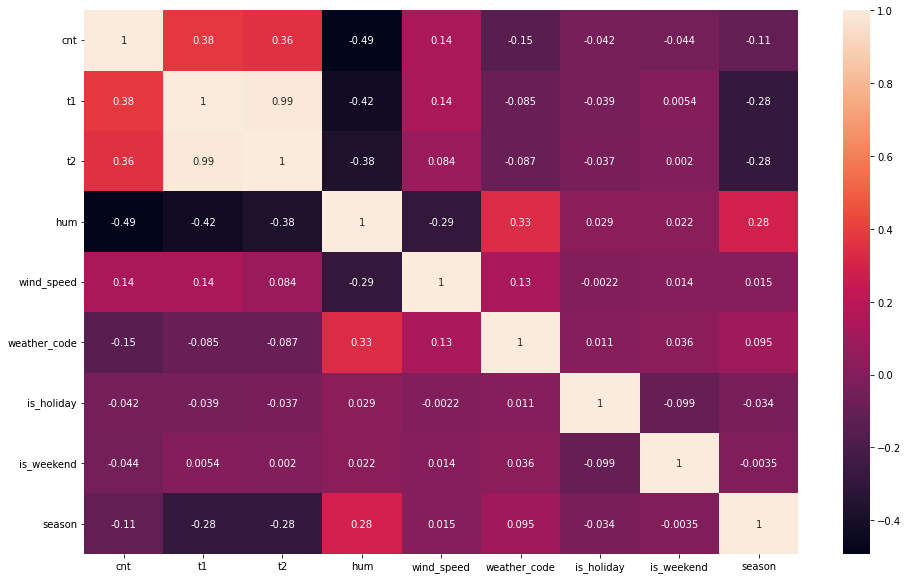

In [46]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

**Observations:**:
- The **registered user** cnt has higher corelation with the cnt as compared to the **casual user cnt**.
- The **windspeed and season** has a very low(near zero) positive corelation with the cnt which means, the windspeed and seasons doesn't have an effect in the demand of  bikes rented.
- The **t1erature and user specific feeling of heat/cold** has a moderated corelation (0.3) with the cnt. People tends to go ot in bright sunny day whne the t1 is normal whereas as during hrsh conditions such as too hot or too cold, the demand in the  bikes has seen a considerable dip.
- The casual users who rents  bikes likes to ride the bikes as the t1erature is suitable.
- When there's a is_holiday, user cnt has seen a considerable dip whereas in working days, the cnt is normal.

# Two - Sample T-Test

**2- Sample T-Test to check if Holiday has an effect on the number of electric cycles rented**

#### Step 1: Define Null & Alternate Hypothesis

Setting up Null Hypothesis (H0) and Stating the alternate hypothesis (Ha) and significance level
- **H0 : The bike's renting cnt in working days and non- working days are equal.**
- **Ha : The bike's renting cnt in working days and non- working days is not equal.**
- alpha = 0.05

#### Step 2: Validate the assumptions
**Two-sample t-test assumptions**
- Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
- Data in each group must be obtained via a random sample from the population.
- Data in each group are normally distributed.
- Data values are continuous.
- The variances for the two independent groups are equal.

In [47]:
bike_data.shape

(16739, 10)

In [48]:
bike_data['is_weekend'].value_counts(normalize = True) * 100

0.0    70.535874
1.0    29.464126
Name: is_weekend, dtype: float64

In [49]:
bike_data['is_weekend'].value_counts()

0.0    11807
1.0     4932
Name: is_weekend, dtype: int64

In [51]:

working_data = bike_data[bike_data['is_weekend'] == 1].sample(4500, replace = False)
non_working_data = bike_data[bike_data['is_weekend'] == 0].sample(4500, replace = False)


**Checking assumptions of the test (Normality, Equal Variance)**
- Using visualization methods - Histogram, Q-Q plot
- Using statistical methods like levene’s test, Shapiro-wilk test

In [52]:
round(working_data['cnt'].std()**2,2), round(non_working_data['cnt'].std()**2 ,2)

(785911.98, 783521.95)

**Observations**: The variance is not equal for both the samples.

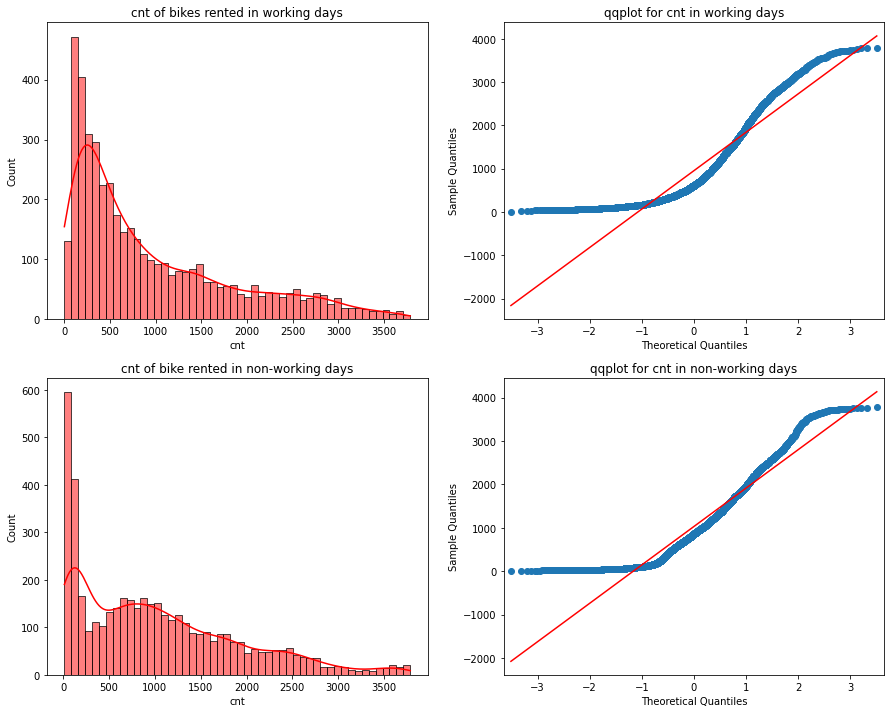

In [53]:
#Checking the normality
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = working_data, x = 'cnt' , bins = 50, kde = True, ax = ax1, color = 'red')
ax1.set_title('cnt of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(working_data['cnt'], line = 's', ax = ax2)
ax2.set_title('qqplot for cnt in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = non_working_data, x = 'cnt' , bins = 50, kde = True, ax = ax3, color = 'red')
ax3.set_title('cnt of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(non_working_data['cnt'], line = 's', ax = ax4)
ax4.set_title('qqplot for cnt in non-working days')

plt.show()

In [54]:
# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided
t_test, p_value = stats.ttest_ind(working_data['cnt'],non_working_data['cnt'],
                                  alternative='greater', equal_var = False)
t_test, p_value

(-4.1183078117734855, 0.9999807460683604)

**Observations**: 
- The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
- We got a p-value of 0.99 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well

**Applying log on the data - Log Normal Distribution**

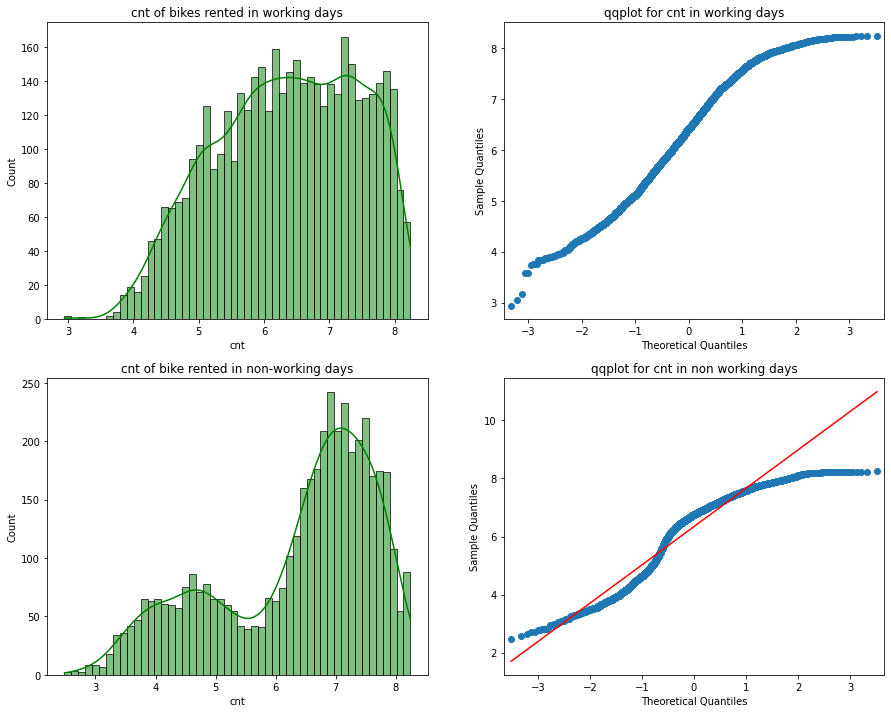

In [55]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = np.log(working_data['cnt']) , bins = 50, kde = True, ax = ax1, color = 'green')
ax1.set_title('cnt of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(np.log(working_data['cnt']), line = 's', ax = ax2)
ax2.set_title('qqplot for cnt in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = np.log(non_working_data['cnt']) , bins = 50, kde = True, ax = ax3, color  = 'green')
ax3.set_title('cnt of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(np.log(non_working_data['cnt']), line = 's', ax = ax4)
ax4.set_title('qqplot for cnt in non working days')

plt.show()

In [56]:
round(np.log(working_data['cnt']).std()**2,2), round(np.log(non_working_data['cnt']).std()**2 ,2)

(nan, 1.74)

**Observations**: After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.

In [58]:
sample_w_log = np.log(working_data['cnt']).sample(4500)
sample_nw_log = np.log(non_working_data['cnt']).sample(4500)

In [59]:
statistic,p_value = stats.ttest_ind(sample_w_log,sample_nw_log , alternative = 'greater')
statistic,p_value

(nan, nan)

In [61]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

In [62]:
htResult(p_value)

Fail to Reject NULL HYPOTHESIS


In [63]:
stats.levene(sample_w_log, sample_nw_log, center='median')

LeveneResult(statistic=nan, pvalue=nan)

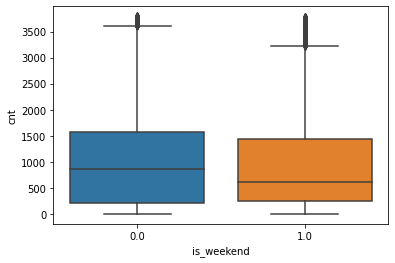

In [64]:
sns.boxplot(x='is_weekend', y='cnt', data=bike_data)
plt.show()

**Conclusion : As the p value > alpha(0.05) , we fail to reject H0 and thus we can say that the cnt of renting of  bikes in both working and non-working days is equal. And we can confirm this using the boxplot as well**

# Chi-square test to check if weather is dependent on the season 

Assumptions:
- Assumption 1: Both variables are categorical.
- Assumption 2: All observations are independent.
- Assumption 3: Cells in the contingency table are mutually exclusive.
- Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.
    - It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

**H0 : Both weather_code and seasons are independent of each other**

**Ha : There is dependency of weather_code on Seasons**

aplha = 0.05

In [65]:
contigency_table = pd.crosstab(bike_data.weather_code,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,0.0,1.0,2.0,3.0,Total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
10.0,7,5,1,1,14
26.0,6,0,10,44,60
Total,4264,4070,4113,4292,16739


In [66]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season,0.0,1.0,2.0,3.0,Row_total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
10.0,7,5,1,1,14
26.0,6,0,10,44,60
Total,4264,4070,4113,4292,16739


A Chi-Square Test of Independence
- As we doing independence test for 2 categorical vaiarbles we are using Chi-squared test.

- Expected value of cells should be 5 or greater in at least 80% of cells & that no cell should have an expected value less than 1.
- We can use the following formula to calculate the expected values for each cell in the contingency table:
- Expected value = (row sum * column sum) / table sum.

In [67]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3, 4, 5, 6 ], [0, 1, 2, 3]]
exp

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1482,1414,1429,1491
2.0,974,930,940,981
3.0,875,835,844,881
4.0,370,353,357,373
7.0,542,517,523,545
10.0,3,3,3,3
26.0,15,14,14,15


#### Weather_code 10 has expeted counts less than 5, so we will drop it.

In [68]:
bike_data['weather_code'].value_counts()

1.0     5818
2.0     3827
3.0     3436
7.0     2129
4.0     1455
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [69]:
bike_data['season'].value_counts()

3.0    4292
0.0    4264
2.0    4113
1.0    4070
Name: season, dtype: int64

In [70]:
bike_data=bike_data[~(bike_data['weather_code']==10.0)]
bike_data['weather_code'].value_counts()

1.0     5818
2.0     3827
3.0     3436
7.0     2129
4.0     1455
26.0      60
Name: weather_code, dtype: int64

In [71]:
contigency_table = pd.crosstab(bike_data.weather_code,bike_data.season,margins=True,margins_name='Total')
contigency_table

season,0.0,1.0,2.0,3.0,Total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
26.0,6,0,10,44,60
Total,4257,4065,4112,4291,16725


#### Weather_code 26 has expeted counts less than 5, so we will drop it.

In [72]:
bike_data=bike_data[~(bike_data['weather_code']==26.0)]
bike_data['weather_code'].value_counts()

1.0    5818
2.0    3827
3.0    3436
7.0    2129
4.0    1455
Name: weather_code, dtype: int64

In [ ]:
contigency_table = pd.crosstab(bike_data.weather_code,bike_data.season,margins=True,margins_name='Total')
contigency_table

In [73]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season,0.0,1.0,2.0,3.0,Row_total
weather_code,,,,,
1.0,1675,1656,1279,1208,5818
2.0,917,1024,976,910,3827
3.0,790,727,966,953,3436
4.0,326,215,366,548,1455
7.0,543,443,515,628,2129
26.0,6,0,10,44,60
Total,4257,4065,4112,4291,16725


In [74]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3, 4 ], [0, 1,2,3]]
exp

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1480,1414,1430,1492
2.0,974,930,940,981
3.0,874,835,844,881
4.0,370,353,357,373
7.0,541,517,523,546


#### No Weather_code  has expeted counts less than 5, so we will continue with Chi Sqaure test

In [ ]:
# bike_data['weather_code'] = bike_data['weather_code'].astype('category')
# bike_data['season'] = bike_data['season'].astype('category')

In [75]:
weather_code_season_dep = pd.crosstab(bike_data['weather_code'], bike_data['season'])
weather_code_season_dep

season,0.0,1.0,2.0,3.0
weather_code,,,,
1.0,1675,1656,1279,1208
2.0,917,1024,976,910
3.0,790,727,966,953
4.0,326,215,366,548
7.0,543,443,515,628


In [76]:
stat, p_value, dof, expected = stats.chi2_contingency(weather_code_season_dep)
stat, p_value, dof, expected
#stat, p, dof, expected

(366.8215668058749,
 3.940835015767994e-71,
 12,
 array([[1484.08748875, 1419.15211521, 1432.06936694, 1482.6910291 ],
        [ 976.21224122,  933.49864986,  941.99543954,  975.29366937],
        [ 876.47380738,  838.12421242,  845.75289529,  875.64908491],
        [ 371.14941494,  354.909991  ,  358.14041404,  370.80018002],
        [ 543.0770477 ,  519.3150315 ,  524.04188419,  542.5660366 ]]))

In [77]:
alpha = 0.05
if p_value >= alpha: 
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"')
else:
    print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


**p- value (2.4810049592886517e-83) < alpha(0.05) --> so we can reject H0**
Which means weather_code and seasons have a significant dependency and Both weather_code and seasons are not independent of each other

**We can conclude that we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather_code and Seasons are dependent on each other**

# ANNOVA to check if no. of cycles rented is similar or different in different weather_code and season

**Assumptions:**
- Normality – that each sample is taken from a normally distributed population
- Sample independence – that each sample has been drawn independently of the other samples
- Variance equality – that the variance of data in the different groups should be the same
- Your dependent variable – here, “cnt”, should be continuous – that is, measured on a scale which can be subdivided using increments

**1. weather_code**

**H0 (Null Hupothesis) :** cnt of bikes rented is same in diffrent types of weather_code

**Ha (Alternate Hupothesis) :** cnt of bikes rented is different in diffrent types of weather_code

**alpha: 0.05**

In [ ]:
# We will be working on bike_dcopy which is already created as a deep copy of the original dataset. 
#This is because, we need to conclude on the basis of all the data and not when we remove the ouliers

In [78]:
bike_dcopy['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

**Checking assumptions of the test (Normality, Equal Variance)**

In [79]:
from scipy.stats import shapiro
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

<AxesSubplot:xlabel='cnt', ylabel='Count'>

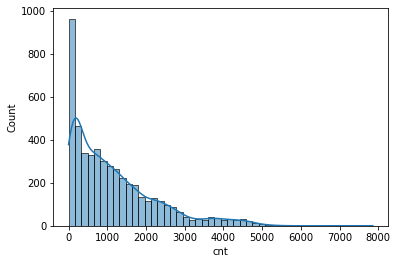

In [80]:
sns.histplot(bike_dcopy['cnt'].sample(5000), kde = True)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

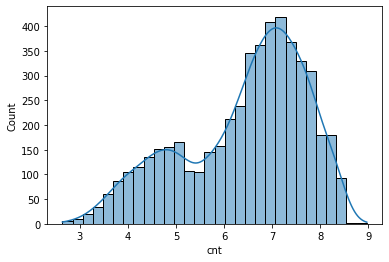

In [81]:
#Taking the log of the above distribution sample as it's not normal.
sns.histplot(np.log(bike_dcopy['cnt'].sample(5000)), kde = True)

In [82]:
# H0: Series is Normal
# Ha : Series is not Normal
# alpha  = 0.05
stats.shapiro(bike_dcopy['cnt'].sample(5000))

ShapiroResult(statistic=0.8581068515777588, pvalue=0.0)

**Observations:** Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wik test that the series is not normal.Still we will be going ahead with the test just to check the results.

In [83]:

# Removing the weather_code type 12.0 and 10.0 as it's variance id diffrent than others and will fail our assumptions
bike_dcopy=bike_dcopy[~(bike_dcopy['weather_code']==10.0) ] 
bike_dcopy=bike_dcopy[~(bike_dcopy['weather_code']==26.0) ]

In [84]:
bike_dcopy['weather_code'].value_counts()

1.0    6150
2.0    4034
3.0    3551
7.0    2141
4.0    1464
Name: weather_code, dtype: int64

#### Normality Test:
We will perform normality check using **Shapiro test.**

The hypothesis of this test are:
- Null Hypothesis Ho - series is normal
- Alternative Hypothesis Ha - series is not normal

In [85]:
normality_check(bike_dcopy['weather_code'].sample(1400, replace = True))

p value = 1.0284689949065562e-40
We reject the Null Hypothesis Ho


#### Equality of Variance Test:
We will perform equivalence check for using using Levene's test.

The hypothesis of this test are:
- Null Hypothesis Ho - Variances are equal
- Alternative Hypothesis Ha - Variances are not equal

In [86]:
bike_dcopy.groupby(['weather_code'])['cnt'].describe() # Variance is different for diff weather_code

,count,mean,std,min,25%,50%,75%,max
weather_code,,,,,,,,
1.0,6150.0,1162.088943,1187.218019,10.0,196.0,745.0,1767.0,7860.0
2.0,4034.0,1496.177491,1085.026155,16.0,747.0,1291.0,2069.0,7531.0
3.0,3551.0,1195.124472,1014.745557,12.0,430.0,964.0,1673.5,5033.0
4.0,1464.0,635.230874,751.408441,14.0,116.0,355.0,875.0,4626.0
7.0,2141.0,712.966371,764.879409,0.0,150.0,471.0,981.0,6585.0


In [87]:
from scipy.stats import levene
def variance_check(series1, series2, series3,series4,series5, alpha=0.05):
    _, p_value = levene(series1, series2, series3)
    print(f'p value = {p_value}')
    if (p_value >= alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [88]:
series1 =   bike_dcopy[bike_dcopy['weather_code'] == 1]['cnt'].sample(1400)
series2 =       bike_dcopy[bike_dcopy['weather_code'] == 2]['cnt'].sample(1400)
series3 =          bike_dcopy[bike_dcopy['weather_code'] == 3]['cnt'].sample(1400)
series4 =       bike_dcopy[bike_dcopy['weather_code'] == 4]['cnt'].sample(1400)
series5 =     bike_dcopy[bike_dcopy['weather_code'] == 7]['cnt'].sample(1400)

In [89]:
variance_check(series1, series2, series3,series4,series5)

p value = 0.00011233476872416524
We reject the Null Hypothesis Ho


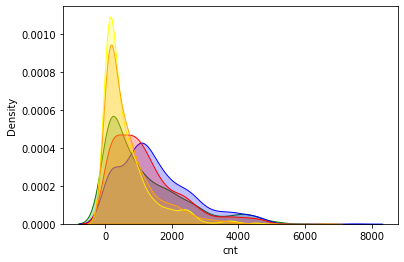

In [90]:
sns.kdeplot(series1,color = 'green',shade='green')
sns.kdeplot(series2,color = 'blue',shade = 'blue')
sns.kdeplot(series3,color = 'red',shade = 'red')
sns.kdeplot(series4,color = 'yellow',shade = 'yellow')
sns.kdeplot(series5,color = 'orange',shade = 'orange')
plt.show()

#### Although both our assumption for normality and varaince failed, we will continue with One way Annova just to check what's the result.

In [91]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['weather_code'] == 1]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 2]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 3]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 4]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 7]['cnt'].sample(1400))
stat,p

(203.159757155076, 4.165151300696957e-165)

In [92]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['weather_code'] == 1]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 2]['cnt'].sample(1400),
                        bike_dcopy[bike_dcopy['weather_code'] == 3]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 4]['cnt'].sample(1400),
                       bike_dcopy[bike_dcopy['weather_code'] == 7]['cnt'].sample(1400))
test, p_val

(79.80315190632791, 2.543555123134609e-66)

**Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in weather_code.**

**2. Seasons**

**H0 (Null Hupothesis) :** cnt of bikes rented is same in different types of seasons

**Ha (Alternate Hupothesis) :** cnt of bikes rented is different in different types of seasons

**alpha: 0.05**

In [93]:
bike_dcopy['season'].value_counts()

1.0    4382
0.0    4381
2.0    4292
3.0    4285
Name: season, dtype: int64

In [94]:
bike_dcopy.groupby(['season'])['cnt'].describe() # The variance is different for all the 4 seasons

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
0.0,4381.0,1105.729057,1039.750044,0.0,235.00,825.0,1625.00,5322.0
1.0,4382.0,1465.654952,1250.962840,12.0,372.00,1216.5,2208.75,7860.0
2.0,4292.0,1181.781221,1095.625343,9.0,299.75,900.5,1718.25,5422.0
3.0,4285.0,827.035939,808.228098,10.0,190.00,640.0,1138.00,4415.0


In [95]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['season'] == 1]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 2]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 3]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 0]['cnt'].sample(4000))
stat,p

(247.28118956356397, 7.283824934150121e-157)

In [96]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['season'] == 1]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 2]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 3]['cnt'].sample(4000),
                        bike_dcopy[bike_dcopy['season'] == 0]['cnt'].sample(4000))
test, p_val

(209.42259780288524, 3.004509838267892e-133)

**Conclusion : As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.**

# Insights ,Conclusions , Inferences and Recommendations:

- There are total 4 categorical features namely Season, is_holiday, is_weekend, weather_code and 7 numerical/continuos features and 1 datatime object. In total 12 independent features with 10886 rows.
- Missing data or Null values are not present , neither any duplicated row is there.
- As the data ranges from 1st Jan 2011 to 19th Dec 2012, the cnt of the bikes rented will also be in this time period of almost 2 years.
- During months of September and October, maximum number of  bikes are rented.
- The cnt is less in the cold seasons of winter(Months such as Nov, Dec, Jan, Feb) where due to cold, people prefer mostly not to ride the bikes.
- As we can see, the data contains dates from 1 to 19th of a particular month.
- As we can from the month wise bar plot , the demand for  bikes at the starting months is quite low as compared to months from March 2012 onwards. There's a drop in the middle owing to cold and winter season.
- There are outliers in windspeed and casual users which tells us that, the windspeed in not uniform. Whereas the casual user cnt varies as they are not registered and not serious in riding the bikes.
- The exponential decay curve for the cnt(reg and non-reg) tells that, as the users renting bikes increases, the frequency decreases.
- For weather_code, in the fourth category i.e (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) no. of users renting bikes is much low and hence it's good to drop the feature while doing further tests.
- cnt for bikes rented in working day is much higher than non working day.
- During is_holidays, people don't prefer to ride bikes.
- When the weather_code is Clear with Few clouds, people tend to rent more  bikes for their comute.
- During the spring, summer, fall, winter, the cnt is more or less eual for the users renting bikes
- The registered user cnt has higher co-relation with the cnt as compared to the casual user cnt.
- The windspeed and season has a very low(near zero) positive co-relation with the cnt which means, the windspeed and seasons doesn't have an effect in the demand of  bikes rented.
- The t1erature and user specific feeling of heat/cold has a moderated co-relation (0.3) with the cnt. People tends to go ot in bright sunny day when the t1 is normal whereas as during harsh conditions such as too hot or too cold, the demand in the  bikes has seen a considerable dip.
- The casual users who rents  bikes likes to ride the bikes as the t1erature is suitable.
- When there's a is_holiday, user cnt has seen a considerable dip whereas in working days, the cnt is normal.
- **2 sample t-test:**
    - The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test. Also the varaince of the samples is unequal.Hence we will do log-transformation
    - We got a p-value of 0.91 which is greater than 0.05 and hence we can say that we can accept the null hypothesis. We will confirm after log - transformation as well
    - After taking log on the sample population, we get a near normal distribution with variance very similar to each other. So we can calculate the p-value and test-statistics.
    - Conclusion : As the p value > alpha(0.05) , we accept H0 and thus we can say that the cnt of renting of  bikes in both working and non-working days is equal. And we can confirm this using the boxplot as well.
- **Chi-Square test:**
    - p- value (6.734426550686341e-08) < alpha(0.05) --> so we can reject H0 Which means weather_code and seasons have a significant dependency and Both weather_code and seasons are not independent of each other
    - We can conclude that our (chi_stat > chi_critical), we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather_code and Seasons are dependent on each other.
- **One-way Anova:**
    - Even after taking log, the distribution is not exactly normal. So our assumption doesn't holds true. Also, we have confirmed with the statistical test -Shapiro wilk test that the series is not normal. Still we will be going ahead with the test just to check the results.
    - As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in weather_code.
    - As the p value < alpha(0.05) , we reject H0 and thus we can conclude that cnt of bikes differs with a change in season.

**In order to conclude, we can say that the major factors affecting the count of bikes rented are season and weather_code. The working and non working days can't be considered as a significant factor in predicting the future of rental business. At the same time, the business team must focus on the months other than winter months for increasing the bike parking zones as during the winter months of (Nov, Dec, Jan, Feb), theres's a considerable dip in the cnt. So the team can utilize these months for serving some other purpose such as renting electric cars, etc which can be a comfortable means for commute in cold.**
